In [0]:
'''
This code is a part of solution attempt from me to check if we can know if two
people are related based on their images
Training and testing data is provided by kaggle.
Following is the link to competition: https://www.kaggle.com/c/recognizing-faces-in-the-wild/overview
'''
from google.colab import drive
drive.mount('/colab/')

Drive already mounted at /colab/; to attempt to forcibly remount, call drive.mount("/colab/", force_remount=True).


In [0]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
!ls '/colab/My Drive/Colab_folder'

dogs-cats  FIW


In [0]:
!ls '/colab/My Drive/Colab_folder/FIW'

Relation_identification_from_face.ipynb  test.zip		  train.zip
sample_submission.csv			 train
test					 train_relationships.csv


In [0]:
##Run this part only once
#import zipfile
##this does not work for nested folders .i.e. if there is folder in folder in 
##folder in the zip file
#zip_ref = zipfile.ZipFile("/colab/My Drive/Colab_folder/FIW/train.zip", 'r')
#zip_ref.extractall("/colab/My Drive/Colab_folder/FIW/train/")
#zip_ref.close()

#zip_ref = zipfile.ZipFile("/colab/My Drive/Colab_folder/FIW/test.zip", 'r')
#zip_ref.extractall("/colab/My Drive/Colab_folder/FIW/test/")
#zip_ref.close()

In [0]:
##run this part only once
##this worked for nested folder
#!unzip '/colab/My Drive/Colab_folder/FIW/train.zip' -d '/colab/My Drive/Colab_folder/FIW/train/'

In [0]:
import pandas as pd
train_reln=pd.read_csv('/colab/My Drive/Colab_folder/FIW/train_relationships.csv')
print(train_reln.head())
print(train_reln.iloc[0,0])
print(type(train_reln.iloc[0,0]))

           p1          p2
0  F0002/MID1  F0002/MID3
1  F0002/MID2  F0002/MID3
2  F0005/MID1  F0005/MID2
3  F0005/MID3  F0005/MID2
4  F0009/MID1  F0009/MID4
F0002/MID1
<class 'str'>


In [0]:
len(train_reln)

3598

In [0]:
import os

def max_size_folder(train_reln):
  size1, size2, prev1, prev2=0,0,0,0
  total_matrix_size=0
  notExistingFolder={}
  for i in train_reln.index:
    #checks if the folder checking relationship exists in the train folder
    try:
      size1=len(os.listdir('/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[i,'p1']))
      if size1>prev1:
        prev1=size1
    except FileNotFoundError:
      #if folder doesnot exist, it is added in a list that keeps track of all the folders that do not exist
      if i not in notExistingFolder.keys():
        notExistingFolder[i]=[train_reln.loc[i,'p1'],]
      else:
        notExistingFolder[i].append(train_reln.loc[i,'p1'])
    try:
      size2=len(os.listdir('/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[i,'p2']))
      total_matrix_size+=size1*size2
      if size2>prev2:
        prev2=size2
    except FileNotFoundError:
      if i not in notExistingFolder.keys():
        notExistingFolder[i]=[train_reln.loc[i,'p2'],]
      else:
        notExistingFolder[i].append(train_reln.loc[i,'p2'])
  print(prev1, prev2)
  return notExistingFolder,total_matrix_size

In [0]:
a=max_size_folder(train_reln)
notExistingFolder,total_matrix_size=a[0],a[1]

95 95


In [0]:
notExistingFolder.keys()

dict_keys([128, 131, 132, 133, 145, 146, 147, 160, 161, 162, 199, 201, 204, 205, 206, 207, 223, 224, 225, 233, 237, 239, 240, 420, 421, 422, 423, 427, 428, 429, 430, 431, 432, 434, 442, 444, 471, 472, 473, 474, 475, 525, 532, 704, 709, 722, 732, 734, 743, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 794, 795, 816, 817, 827, 829, 831, 839, 844, 845, 846, 847, 848, 881, 882, 883, 886, 887, 889, 890, 891, 892, 896, 897, 918, 919, 922, 933, 941, 943, 946, 947, 951, 962, 970, 1073, 1077, 1078, 1080, 1108, 1115, 1116, 1118, 1122, 1123, 1125, 1262, 1264, 1266, 1268, 1270, 1382, 1384, 1387, 1390, 1392, 1448, 1458, 1490, 1516, 1518, 1519, 1554, 1555, 1556, 1557, 1558, 1566, 1571, 1577, 1581, 1586, 1601, 1605, 1606, 1608, 1609, 1613, 1614, 1688, 1689, 1705, 1706, 1722, 1723, 1724, 1725, 1726, 1728, 1798, 1799, 1876, 1878, 1880, 1937, 1939, 2006, 2007, 2070, 2108, 2161, 2164, 2168, 2265, 2269, 2271, 2272, 2273, 2274, 2276, 2277, 2315, 2317, 2360, 2361, 2384, 2430, 2431, 2483, 2499, 2500, 251

In [0]:
'''
This part is used to remove the parts of dataframe which points to folder that
do not exist.
'''
for key in notExistingFolder.keys():
  train_reln=train_reln.drop(key)

In [0]:
total_matrix_size

167785

In [0]:
len(train_reln)

3367

In [0]:
'''
Creating a dataframe with a columns having information about images that are related
related_dataframe: dataframe that stores information about image
Column: Image-1: stores numpy array of number representing an image
Column: Image-2: stores numpy array of number representing an image related to Image-1
'''
import matplotlib.pyplot as plt
import numpy as np
import keras

Using TensorFlow backend.


In [0]:
a=plt.imread('/colab/My Drive/Colab_folder/FIW/train/F0009/MID1/P10576_face2.jpg')

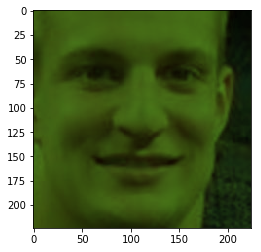

In [0]:
black=np.array(a/255.0)
for i in range(len(black)):
  for j in range(len(black[i])):
    black[i][j]*= np.array([0.299, 0.587, 0.144])
plt.imshow(black)

In [0]:
'''
creating database of related images
'''
#the dataframe acting as database
import pandas as pd
import os
import matplotlib.pyplot as plt

related_dataframe=pd.DataFrame(columns=['Image-1','Image-2','relation'])

'''
1. get into each folder that contains image of related people.
2. create all possible permutation of related images.
3. image-1 will be image from column p1.
4. image-2 will be image from column p2.
5. relation will have value 1 when there is relation between the photos.

#train_reln.head()

p1	p2
0	F0002/MID1	F0002/MID3
1	F0002/MID2	F0002/MID3
2	F0005/MID1	F0005/MID2
3	F0005/MID3	F0005/MID2
4	F0009/MID1	F0009/MID4
'''
'''
Commented until better method is thought of!
for indx in train_reln.index:
  #getting location of first folder with related image
  locn_p1='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[indx,'p1']
  #getting location of second folder with related image
  locn_p2='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[indx,'p2']
  
  #getting list of files in first folder
  files_in_p1=os.listdir(locn_p1)
  #getting list of files in second folder
  files_in_p2=os.listdir(locn_p2)
  for image_file_name_p1 in files_in_p1:
    #reading image file in location of p1 and converting it to grey scale
    img1=plt.imread(locn_p1+image_file_name_p1)/255.0 * np.array([0.299, 0.587, 0.144])
    for image_file_name_p2 in files_in_p2:
      #reading image file in location of p1
      img2=plt.imread(locn_p1+image_file_name_p2)/255.0 * np.array([0.299, 0.587, 0.144])
      related_dataframe.loc[indx,'Image-1']=img1
      related_dataframe.loc[indx,'Image-2']=img2
        '''

In [0]:
locn_p1='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[indx,'p1']

In [0]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import SGD
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense

In [0]:
#getting location of first folder with related image
locn_p1='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[0,'p1']
#getting location of second folder with related image
locn_p2='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[0,'p2']

img1=plt.imread(locn_p1+'/'+os.listdir(locn_p1)[0])/255.0
img2=plt.imread(locn_p2+'/'+os.listdir(locn_p2)[0])/255.0
img3=plt.imread(locn_p2+'/'+os.listdir(locn_p2)[1])/255.0
img4=plt.imread(locn_p2+'/'+os.listdir(locn_p2)[2])/255.0
img5=plt.imread(locn_p2+'/'+os.listdir(locn_p2)[3])/255.0

In [0]:
img6=(img1+img2+img3+img4+img5)/(6.0*255)

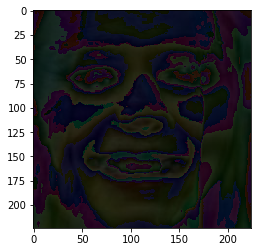

In [0]:
plt.imshow(img6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


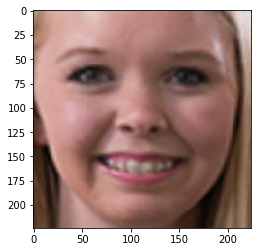

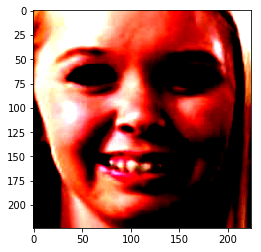

In [0]:
def prewhiten(x):
    if x.ndim == 4:
        axis = (1, 2, 3)
        size = x[0].size
    elif x.ndim == 3:
        axis = (0, 1, 2)
        size = x.size
    else:
        raise ValueError('Dimension should be 3 or 4')

    mean = np.mean(x, axis=axis, keepdims=True)
    std = np.std(x, axis=axis, keepdims=True)
    std_adj = np.maximum(std, 1.0/np.sqrt(size))
    y = (x - mean) / std_adj
    return y
img7=prewhiten(img3)
plt.figure('not whitened')
plt.imshow(img3)
plt.figure('whitened')
plt.imshow(img7)

In [0]:
print((np.sum((img2-img3)**2)),(np.sum((img2-img4)**2)),(np.sum((img2-img5)**2)),)
print(np.sum((img1-img3)**2),np.sum((img1-img4)**2),np.sum((img1-img5)**2),)

4894.2387081891575 5836.188773548635 6504.808073817763
11943.725013456364 13365.176716647444 15334.536931949253


In [0]:
plt.figure()
plt.imshow(img2)
plt.figure()
plt.imshow(img3)
plt.figure()
plt.imshow(img4)
plt.figure()
plt.imshow(img5)
plt.figure()
plt.imshow(img1)

In [0]:
model=Sequential([Conv2D(4,(3,3),input_shape=(224,224,3),padding='same',activation='relu'),])

In [0]:
len(np.concatenate(img1)),len(img1)

(50176, 224)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True
                                    )

train_generator = train_datagen.flow_from_directory(
        '/colab/My Drive/Colab_folder/FIW/train/',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 12379 images belonging to 470 classes.


In [0]:
#getting location of first folder with related image
locn_p1='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[0,'p1']
#getting location of second folder with related image
locn_p2='/colab/My Drive/Colab_folder/FIW/train/'+train_reln.loc[0,'p2']

img1=plt.imread(locn_p1+'/'+os.listdir(locn_p1)[0])/255.0
img2=plt.imread(locn_p2+'/'+os.listdir(locn_p2)[0])/255.0
img3=plt.imread(locn_p2+'/'+os.listdir(locn_p2)[1])/255.0
img4=plt.imread(locn_p2+'/'+os.listdir(locn_p2)[2])/255.0
img5=plt.imread(locn_p2+'/'+os.listdir(locn_p2)[3])/255.0

In [0]:
def dist_between_images(list_of_images):
  dist=[]
  for i in range(1,len(list_of_images)):
    dist.append(np.sqrt(np.sum((list_of_images[0]-list_of_images[i])**2)))
  return dist